In [1]:
import datetime
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.stattools import grangercausalitytests

In [2]:
# 경제지표 데이터 가져오기

df = pd.read_excel('../index_Infomation_v2_bitcoin.xlsx')
df['Date'] = pd.to_datetime(df['Date'])
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '../index_Infomation_v2_bitcoin.xlsx'

In [ ]:
compare1 = "bitcoin"  # samsung, apple
compare2 = "Consum_PI"
compare2data = "미국 미시간대 소비자심리지수"

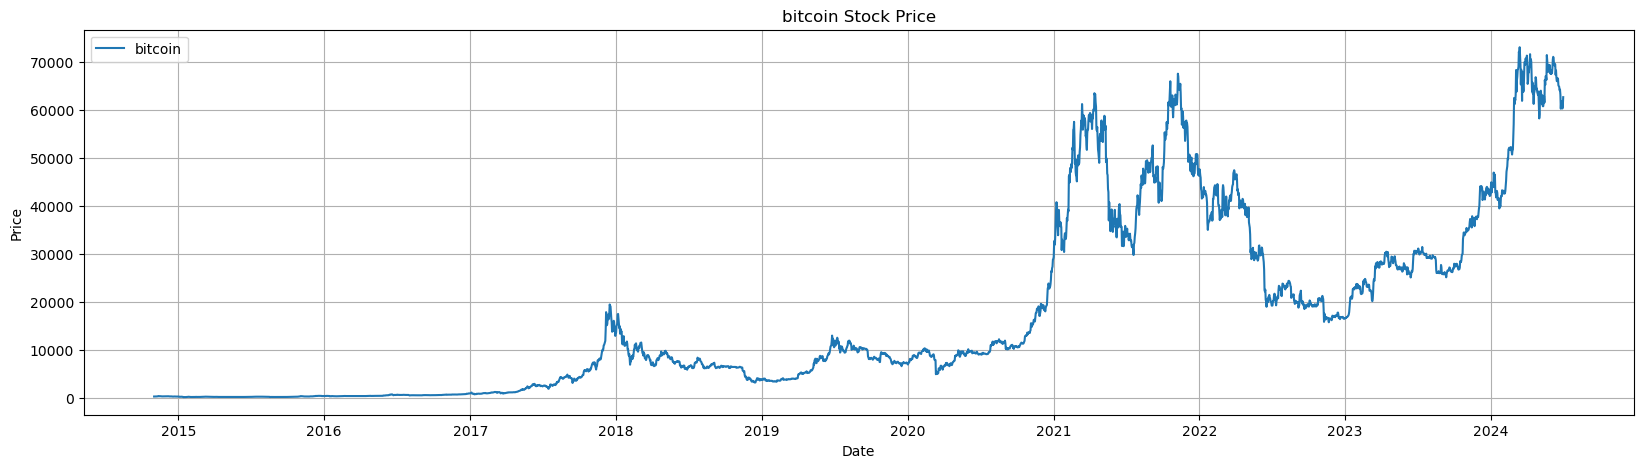

In [ ]:
# 삼성전자 주식 그래프 그리기

plt.figure(figsize=(20, 5))
plt.plot(df['Date'], df[f'{compare1}_Close'], label=f'{compare1}')

plt.title(f'{compare1} Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.show()

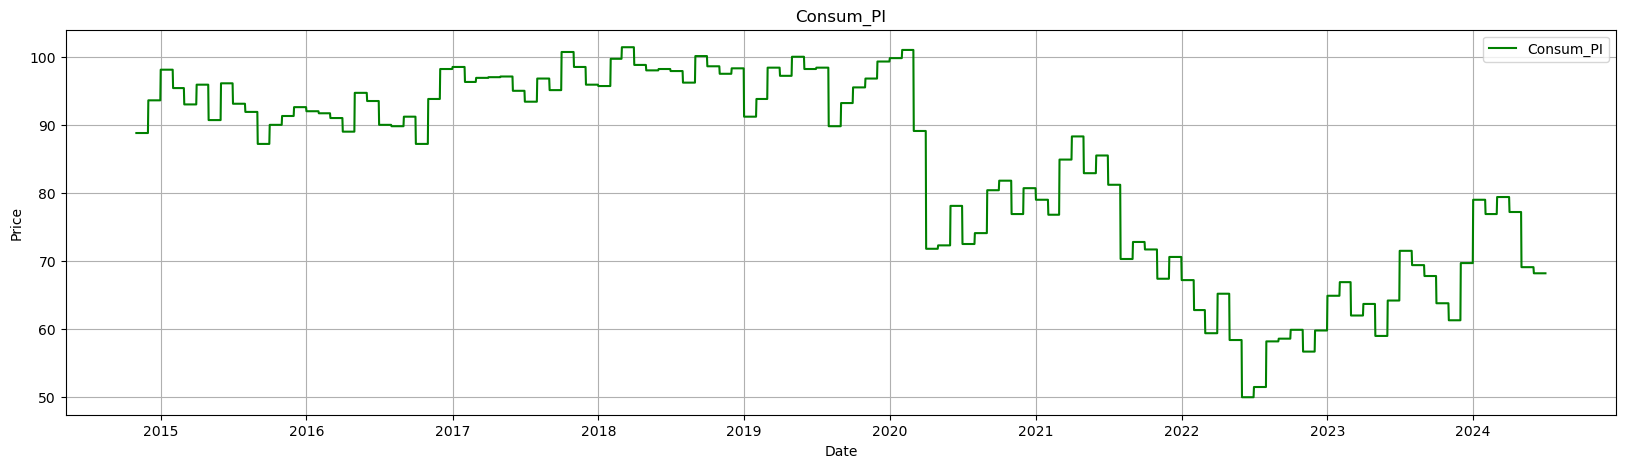

In [ ]:
# 경제지표 그래프 그리기

plt.figure(figsize=(20,5))
plt.plot(df['Date'], df[f'{compare2data}'], label=f'{compare2}', color = 'green')

plt.title(f'{compare2}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.show()

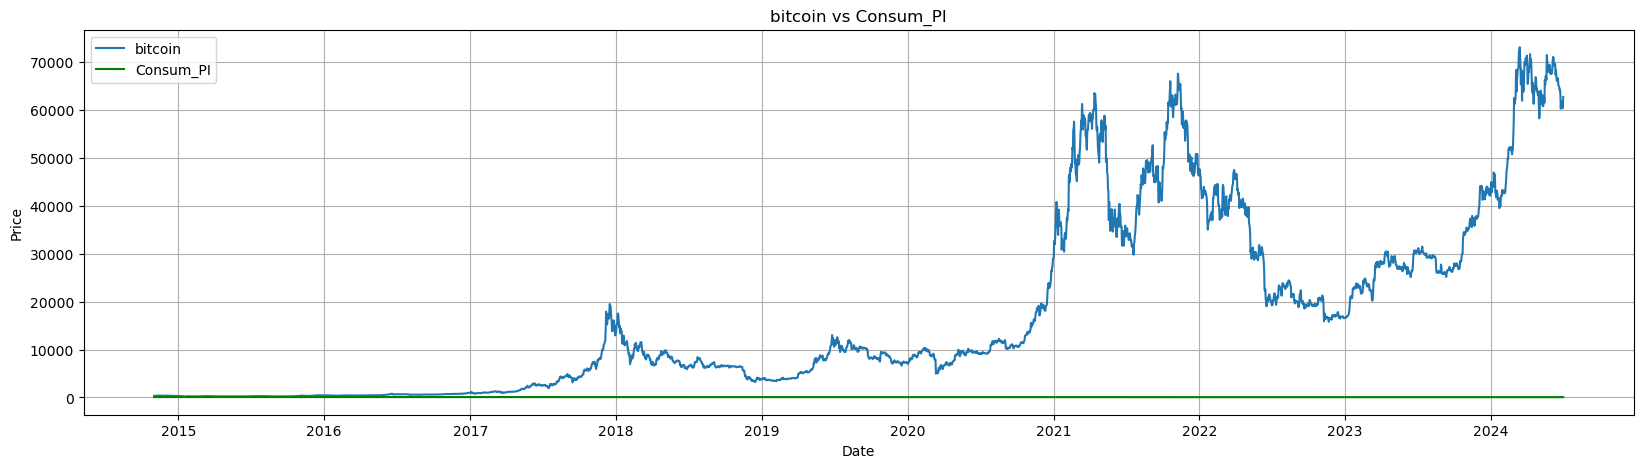

In [ ]:
# vs 그래프 그리기

plt.figure(figsize=(20,5))
plt.plot(df['Date'], df[f'{compare1}_Close'], label=f'{compare1}')
plt.plot(df['Date'], df[f'{compare2data}'], label=f'{compare2}', color='green')

plt.title(f'{compare1} vs {compare2}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
# 0과 1 사이의 값으로 정규화
def normalize(df, column):
    return (df[column] - df[column].min()) / (df[column].max() - df[column].min())

In [ ]:
compare1_normalize = normalize(df, f'{compare1}_Close')
compare2_normalize = normalize(df, f'{compare2data}')

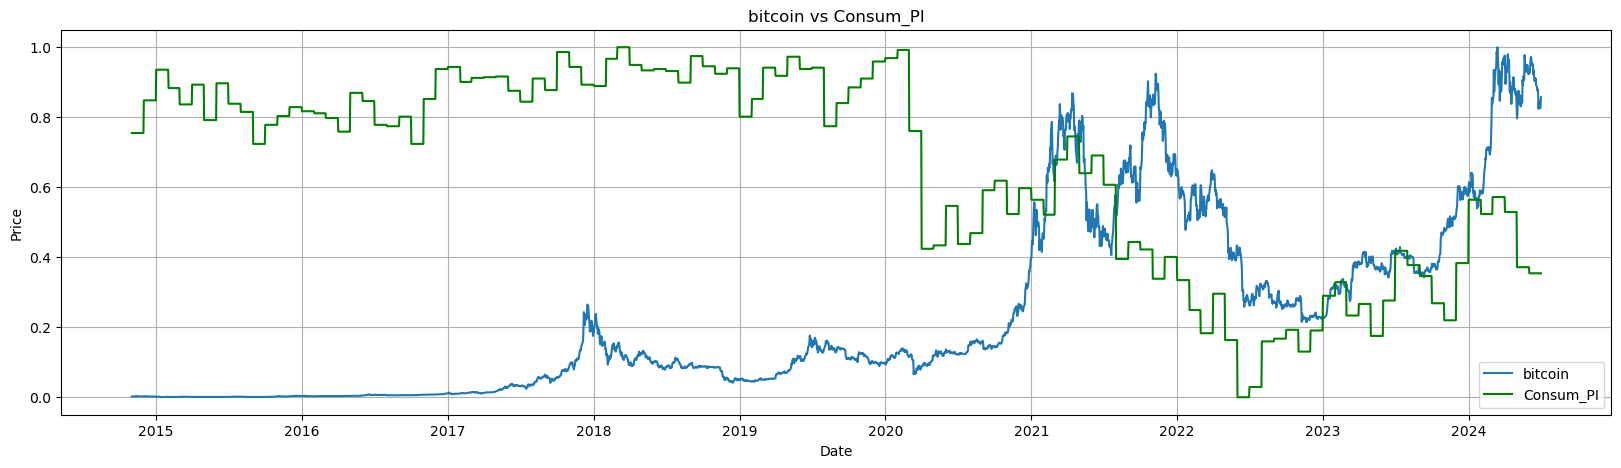

In [ ]:
# 정규화 적용 vs 그래프

plt.figure(figsize=(20, 5))
plt.plot(df['Date'], compare1_normalize, label=f'{compare1}')
plt.plot(df['Date'], compare2_normalize, label=f'{compare2}', color='green')

plt.title(f'{compare1} vs {compare2}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
# 변동율 차이 비교
compare1_daily_change = df[f'{compare1}_Close'].pct_change()
compare2_daily_change = df[f'{compare2data}'].pct_change()

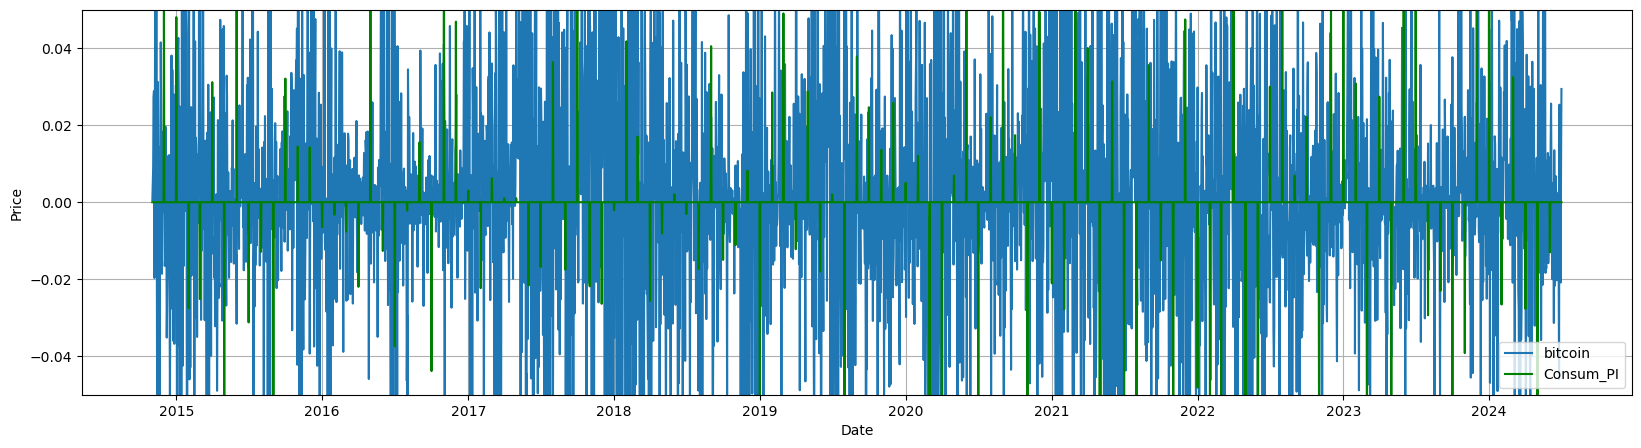

In [ ]:
#그래프화
plt.figure(figsize=(20,5))
plt.plot(df['Date'], compare1_daily_change, label=f'{compare1}')
plt.plot(df['Date'], compare2_daily_change, label=f'{compare2}', color='green')
plt.ylim(-0.05, 0.05)

plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


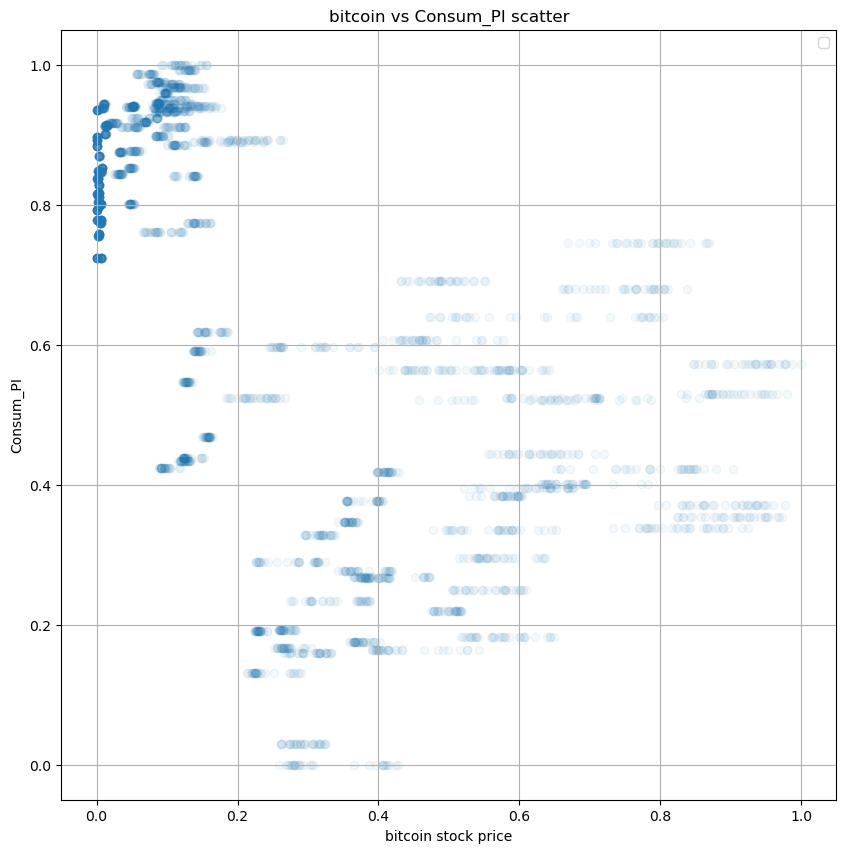

In [ ]:
# 정규화 데이터로 산점도 그래프
plt.figure(figsize=(10,10))
plt.scatter(compare1_normalize, compare2_normalize, alpha=0.05)

plt.title(f'{compare1} vs {compare2} scatter')
plt.xlabel(f'{compare1} stock price')
plt.ylabel(f'{compare2}')
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
# Calculate the correlation
correlation = df[f'{compare2data}'].corr(df[f'{compare1}_Close'])
print(f"Correlation between {compare2} and {compare1} Stock Price: {correlation:.2f}")

Correlation between Consum_PI and bitcoin Stock Price: -0.62
